## Importing libraries

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Reading csv

In [272]:
train=pd.read_csv("trainfr.csv")
test=pd.read_csv("testfr.csv")
train.shape
#ans=pd.read_csv("sample_submissionfr.csv")

(54697, 8)

### Dropping unecessary columns

In [273]:
train.drop(["Person A","Person B","ID"],axis=1,inplace=True)
test.drop(["Person A","Person B"],axis=1,inplace=True)

In [229]:
combined=pd.concat([train,test],axis=0)

In [146]:
combined.drop(["ID"],axis=1,inplace=True)

## Years of Knowing

In [147]:
train["Years of Knowing"].describe()

count    54697.000000
mean         4.650547
std          3.371210
min          0.000286
25%          2.062862
50%          3.781148
75%          6.295307
max         14.999167
Name: Years of Knowing, dtype: float64

## Interaction Duration

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

train = scaleColumns(train,['Years of Knowing','Interaction Duration'])

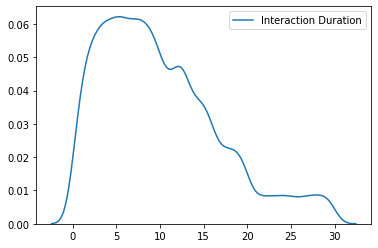

In [210]:
sns.kdeplot(train['Interaction Duration'])

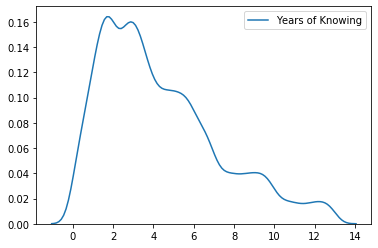

In [209]:
sns.kdeplot(train['Years of Knowing'])

In [208]:
train.drop(train[train['Years of Knowing']>13].index,inplace=True)

In [256]:
train["Years of Knowing"]=stats.boxcox(train["Years of Knowing"],0.5)
train['Interaction Duration']=stats.boxcox(train["Interaction Duration"],0.5)


In [257]:
train.shape

(54697, 5)

,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction,Friends
0,1.937796,5.220835,Class,Waning_Gibbous,1
1,1.368215,2.821381,At Work,Waxing_Cresent,0


In [232]:
train = pd.get_dummies(train, columns=['Interaction Type','Moon Phase During Interaction'],drop_first=True)
#pd.get_dummies(train["Interaction Type"], drop_first=True)
#pd.get_dummies(train["Moon Phase During Interaction"], drop_first=True)

## Fitting XGBoost model

In [233]:
#train.drop(["Years of Knowing","Interaction Duration"],inplace=True,axis=1)

In [274]:
train.drop(["Interaction Type","Moon Phase During Interaction"],axis=1,inplace=True)

In [275]:
train.head(2)

,Years of Knowing,Interaction Duration,Friends
0,3.876560,13.035115,1
1,2.836218,5.811429,0


In [276]:
from scipy import stats

In [277]:
train.dtypes

Years of Knowing        float64
Interaction Duration    float64
Friends                   int64
dtype: object

In [284]:
Y=train["Friends"].values
X=train.drop(["Friends"],axis=1).values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [285]:
#XGBoost regressor
from xgboost import XGBClassifier
classifier=XGBClassifier(base_score=0.3,learning_rate=0.01,n_estimators=600,min_child_weight=1,max_depth=5,reg_lambda=0.5)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.3, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.5, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [186]:
# # Random forest
# from sklearn.ensemble import RandomForestClassifier
# classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
# classifier.fit(X_train,y_train)

In [271]:
y_pred = classifier.predict(X_test)

In [264]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7641,  755],
       [ 616, 7398]])

In [265]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred)*100)

91.64533820840951


In [1008]:
df_final=pd.DataFrame(X_test,y_test)

In [144]:
pd.concat([check1,y_pred],axis=1)

KeyboardInterrupt: 

In [ ]:
check1.head(2)

In [186]:
#Accuracy


90.61866125760649


## Training a neural network

In [279]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import l2

In [282]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [283]:
history=model.fit(X, Y, epochs=60, validation_data=(X_test, y_test),batch_size=16)
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train on 54697 samples, validate on 16410 samples
Epoch 1/60
54697/54697 [==============================] - 14s 248us/step - loss: 0.2361 - acc: 0.8942 - val_loss: 0.1978 - val_acc: 0.9126
Epoch 2/60
54697/54697 [==============================] - 11s 207us/step - loss: 0.1883 - acc: 0.9136 - val_loss: 0.1909 - val_acc: 0.9119
Epoch 3/60
54697/54697 [==============================] - 13s 243us/step - loss: 0.1869 - acc: 0.9150 - val_loss: 0.1900 - val_acc: 0.9113
Epoch 4/60
54697/54697 [==============================] - 12s 221us/step - loss: 0.1870 - acc: 0.9141 - val_loss: 0.2016 - val_acc: 0.9102
Epoch 5/60
54697/54697 [==============================] - 12s 211us/step - loss: 0.1864 - acc: 0.9144 - val_loss: 0.1908 - val_acc: 0.9089
Epoch 6/60
54697/54697 [==============================] - 11s 210us/step - loss: 0.1854 - acc: 0.9144 - val_loss: 0.1941 - val_acc: 0.9129
Epoch 7/60
54697/54697 [==============================] - 13s 236us/step - loss: 0.1844 - acc: 0.9145 - val_loss: 0.

54697/54697 [==============================] - 7s 120us/step - loss: 0.1632 - acc: 0.9140 - val_loss: 0.1679 - val_acc: 0.9123
Epoch 60/60
54697/54697 [==============================] - 7s 120us/step - loss: 0.1629 - acc: 0.9148 - val_loss: 0.1669 - val_acc: 0.9135
Train: 0.918, Test: 0.914


In [286]:
predictions = model.predict_classes(X_test)

In [287]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predictions)*100)

91.3528336380256


## Predicting test set

In [289]:
test.drop(["Interaction Type","Moon Phase During Interaction"],axis=1,inplace=True)

In [291]:
y_pred=pd.DataFrame(classifier.predict(test.drop(["ID"],axis=1).values),columns=["Friend"])

In [292]:
final_df=pd.concat([test,y_pred],axis=1)

In [294]:
final_df.drop(["Years of Knowing","Interaction Duration"],axis=1,inplace=True)

In [295]:
final_df.to_csv("Neural1.csv")

In [0]:
ans['Friends']=y_p

In [0]:
ans["Friends"]=ans['Friends'].astype(int)

## Creating solution csv

In [0]:
ans.to_csv('friends.csv',index=False)

In [0]:
ans.dtypes

ID         int64
Friends    int64
dtype: object

In [0]:
ans.head()

,ID,Friends
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
